# Bonus Track Assignment 1
## BCM Rule

In [145]:
import numpy as np
from matplotlib import pyplot as plt

In [146]:
#1) Load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)

In [147]:
#2) Implement a linear firing rate model
def linear_model(u,w):
    return np.dot(u,w)

Epoch 0 of 1000
Epoch 100 of 1000
Epoch 200 of 1000
Epoch 300 of 1000
Stopped at epoch 359 because of w convergence
Training finished
36001
36001


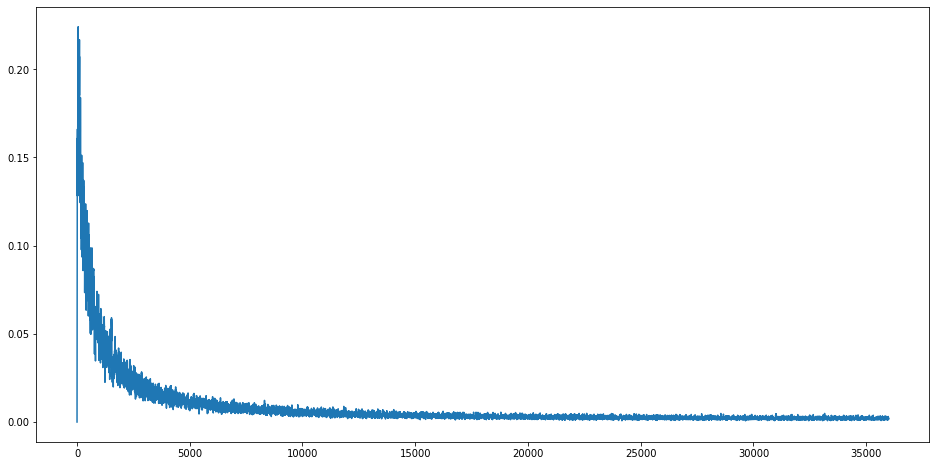

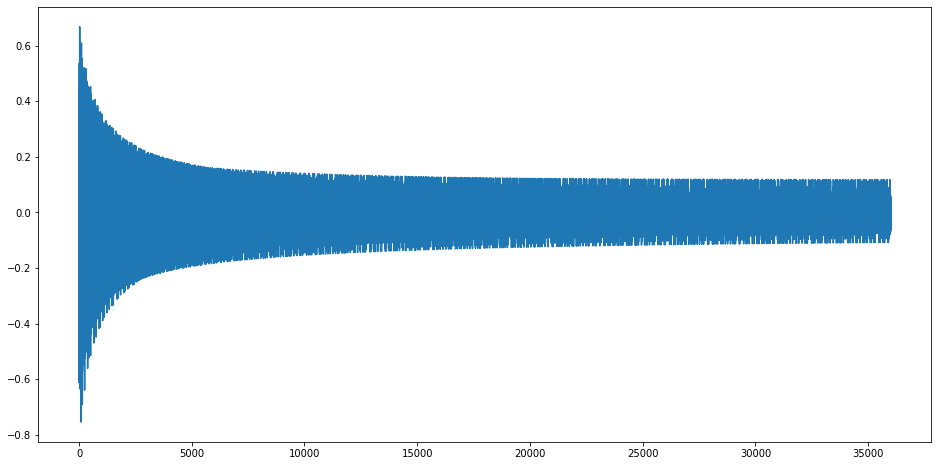

In [161]:
#Implement BCM Rule
name = 'BCM Rule'
#randomly initialized wheight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-4
epochs = 1000
theta_v = 0
eta_theta = 0.1 # defined as 1/tau_theta

#to keep track of evolution of w during training
w_hist = w
wold = w
theta_hist = theta_v
v_hist= 0
for N in range (epochs):


    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #BCM rule
        theta_v = theta_v + eta_theta*(v**2-theta_v)
        w = w + eta*v*uu[i]*(v-theta_v)

        w_hist = np.vstack((w_hist, w))
        theta_hist = np.append(theta_hist, theta_v)
        v_hist = np.append(v_hist, v)

    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    if np.linalg.norm(w) > 1e50:
       print(f"Stopped at epoch {N} to prevent overflow")
       break
    wold = w

print('Training finished')
plt.figure(figsize=(16, 8))
t=np.arange(0,len(theta_hist))
print(len(t))
plt.plot(t, theta_hist)
plt.figure(figsize=(16, 8))

t=np.arange(0,len(v_hist))
print(len(t))
plt.plot(t, v_hist)

36001
36001


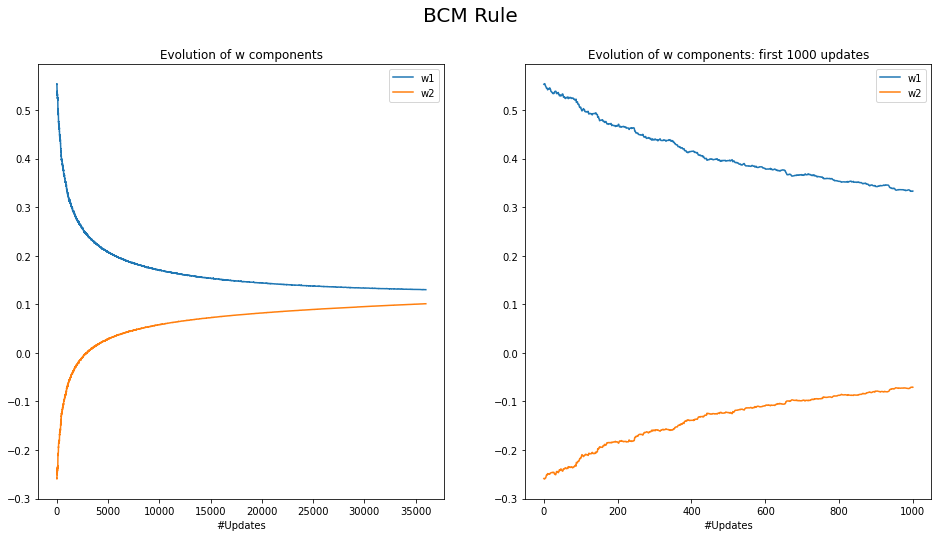

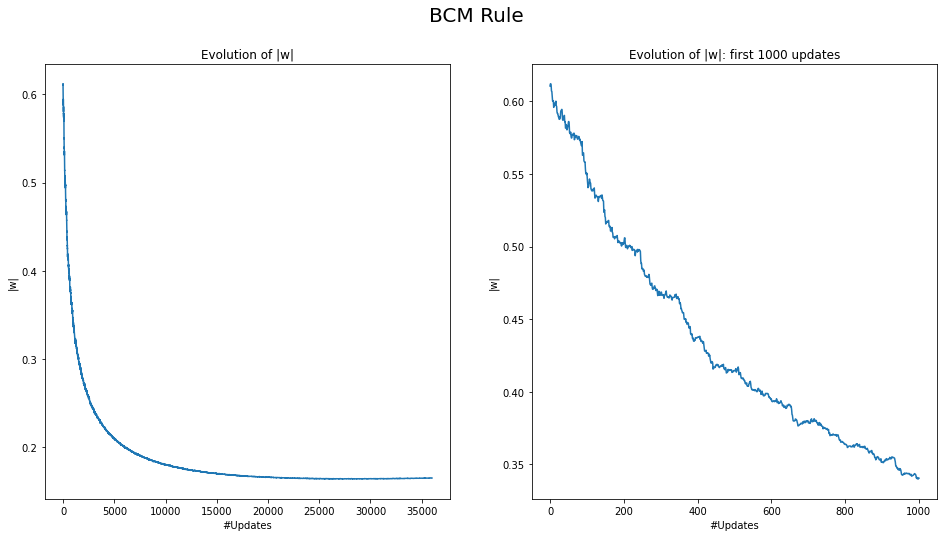

In [162]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)

ax1 = plt.subplot(1,2,1)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
ax1.set_xlabel('#Updates')
plt.legend()

ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of w components: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w1[mask], label='w1')
plt.plot(t[mask], w2[mask], label='w2')
plt.legend()
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_w_evolution',format='pdf')


plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
ax1 = plt.subplot(1,2,1)
plt.title('Evolution of |w|')
ax1.set_ylabel('|w|')
ax1.set_xlabel('#Updates')
plt.plot(t, w_norm)



print(len(w_norm))
print(len(t))
ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of |w|: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w_norm[mask])
ax2.set_ylabel('|w|')
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_|w|_evolution',format='pdf')


plt.show()

In [163]:
#Compute correlation matrix
Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])
Q = Q/len(u)

print('Correlation matrix:\n',Q)

#Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Q)

#Principal eigenvector
max_eigvect = eig_vec[:,np.argmax(eig_val)]
print('\nMax eigvect:\n',max_eigvect)

Correlation matrix:
 [[ 0.32640973 -0.25904598]
 [-0.25904598  0.321666  ]]

Max eigvect:
 [ 0.71033647 -0.70386228]


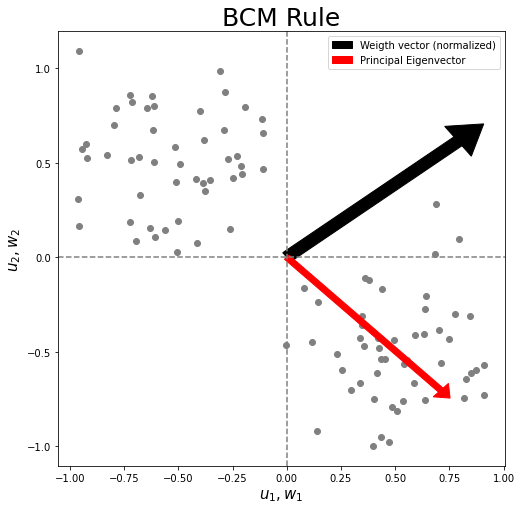

In [164]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
plt.axhline(y=0, color='grey', linestyle = '--')
plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(0,0, w[0]/np.linalg.norm(w), w[1]/np.linalg.norm(w) , width=0.06, head_width=0.2, head_length=0.15, label='Weigth vector (normalized)', color = 'black')

#principal eigenvector
plt.arrow(0,0, max_eigvect[0], max_eigvect[1] , width=0.03, head_width=0.1, head_length=0.06, label='Principal Eigenvector', color = 'red')
plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()